In [1]:
# Magic command
%matplotlib inline

In [2]:
# Import requires Modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Inptut Files:
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

In [4]:
# Convert input data into a DataFrame
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [5]:
# Print city data DF
print("This is the city_data DF")
city_data_df.head(3)

This is the city_data DF


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban


In [6]:
# Print ride data DF
print("This is the ride data DF")
ride_data_df.head(3)

This is the ride data DF


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003


### Working in the City_Data
For the city_data_df DataFrame, we need to:
1. Get all the rows that contain null values.
2. Make sure the driver_count column has an integer data type.
3. Find out how many data points there are for each type of city.

In [7]:
# Check the data type of every column in the DF
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the number of rows per column
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [9]:
# Check if there are null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [10]:
# Check how many unique cities there are in the city_df
len(city_data_df["city"].unique().tolist())

120

In [11]:
# Get the unique values for the "type" column:
type_list = city_data_df["type"].unique()

In [12]:
# Get the number of "Urban" data points from the "type" column:
type_count = []
for i in type_list:
    count = sum(city_data_df["type"]==i)
    type_count.append(count)
    print("There are " + str(count) + " " + i + " type drivers")

There are 66 Urban type drivers
There are 36 Suburban type drivers
There are 18 Rural type drivers


### Working in the Ride Data
For the ride_data_df DataFrame, we need to:
1. Get all the rows that contain null values.
2. Make sure the fare and ride_id columns are numerical data types.

In [13]:
# Check the data type of every column in the DF
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Get the number of rows per column
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# Check if there are null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

### Merging the DataFrames
The column the DataFrames have in common is city. Therefore, we will merge the two DataFrames on the city column, and then add the city_data_df to the end of the ride_data_df DataFrame with the constraint how="left".

In [16]:
# Merge DFs:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head(3)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban


### Create Bubble Chart

create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the average number of drivers for each city type: urban, suburban, and rural.

For the bubble chart, we will need to plot the following:

1. The average fare for each type of city on the y-axis
2. The total number of rides for each type of city on the x-axis
3. Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city


Here are the steps to create a bubble chart:

To get the average fare, we can use the Pandas mean() method for each city in the "fare" column.m
To get the total number of rides for each city, we can use the Pandas count() method for each city in the "ride_id" column.
To make the bubble size correlate to the number of drivers for each city, we can get the average driver_count for each city.
Completing the steps will be more efficient if we create separate DataFrames for each type and then create Data Series for each step.

Each new DataFrame can be created by filtering the pyber_data_df DataFrame where the city type is equal to Urban, Suburban, or Rural.m

In [17]:
# Create the city types DataFrames.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df.head(3)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural


In [18]:
# Get the number of rides for each type of city.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head(3)

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Name: ride_id, dtype: int64

In [19]:
# Get average fare for each type of city.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head(3)

city
Amandaburgh    24.641667
Barajasview    25.332273
Carriemouth    28.314444
Name: fare, dtype: float64

In [20]:
# Get the number of drivers for each type of city.
# Note that we are calculating the mean of the driver_count.
# Averaging the driver count will not change its value, it would be the same result if we remove the .mean() option
# However we do need it in order to make the result an integer, otherwise it would be a string and then we would get problems when plotting
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

### Create the Scatter Plot

#### Create individual city bubble chart

Our first task will be to create a scatter plot for each type of city where the following conditions are met:

The x-axis is the number of rides for each city.
The y-axis is the average fare for each city.
The size of each marker is the average number of drivers in each city.

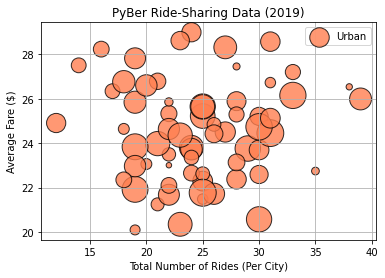

In [21]:
# Build the scatter plots for the urban type of city. Make the size of the points, the driver count
plt.scatter(urban_ride_count, # X axis
            urban_avg_fare, # Y axis
            s=10*urban_driver_count, # Size of points equal to values of list times 10
            c='coral', # Color
            edgecolor="black", # Color of edge of points
            linewidths=1, # Width of the lines of the edges of the points
            alpha=0.8, # Transparency 0f 20%
            label="Urban") # This text will be shown in the legend
plt.title("PyBer Ride-Sharing Data (2019)") # Plot title
plt.ylabel("Average Fare ($)") # Y axis label
plt.xlabel("Total Number of Rides (Per City)") # X axis label
plt.grid(True) # Grid
plt.legend() # Add the legend.
plt.show()

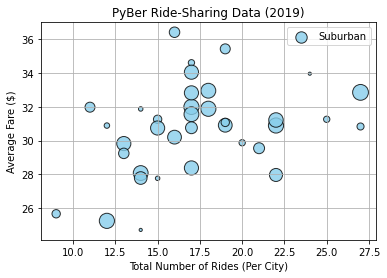

In [22]:
# Build the scatter plots for the suburban type of city. Make the size of the points, the driver count
plt.scatter(suburban_ride_count, # X axis
            suburban_avg_fare, # Y axis
            s=10*suburban_driver_count, # Size of points equal to values of list times 10
            c='skyblue', # Color
            edgecolor="black", # Color of edge of points
            linewidths=1, # Width of the lines of the edges of the points
            alpha=0.8, # Transparency 0f 20%
            label="Suburban") # This text will be shown in the legend
plt.title("PyBer Ride-Sharing Data (2019)") # Plot title
plt.ylabel("Average Fare ($)") # Y axis label
plt.xlabel("Total Number of Rides (Per City)") # X axis label
plt.grid(True) # Grid
plt.legend() # Add the legend.
plt.show()

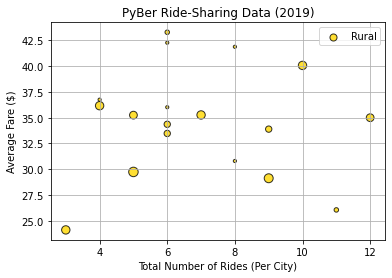

In [23]:
# Build the scatter plots for the rural type of city. Make the size of the points, the driver count
plt.scatter(rural_ride_count, # X axis
            rural_avg_fare, # Y axis
            s=10*rural_driver_count, # Size of points equal to values of list times 10
            c='gold', # Color
            edgecolor="black", # Color of edge of points
            linewidths=1, # Width of the lines of the edges of the points
            alpha=0.8, # Transparency 0f 20%
            label="Rural") # This text will be shown in the legend
plt.title("PyBer Ride-Sharing Data (2019)") # Plot title
plt.ylabel("Average Fare ($)") # Y axis label
plt.xlabel("Total Number of Rides (Per City)") # X axis label
plt.grid(True) # Grid
plt.legend() # Add the legend.
plt.show()

#### Add the three individual bubble charts

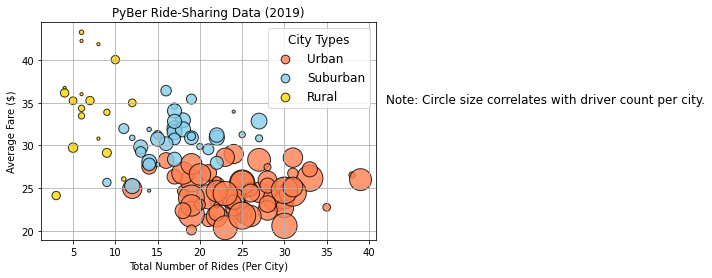

In [24]:
plt.scatter(urban_ride_count, # X axis
            urban_avg_fare, # Y axis
            s=10*urban_driver_count, # Size of points equal to values of list times 10
            c='coral', # Color
            edgecolor="black", # Color of edge of points
            linewidths=1, # Width of the lines of the edges of the points
            alpha=0.8, # Transparency 0f 20%
            label="Urban") # This text will be shown in the legend

plt.scatter(suburban_ride_count, # X axis
            suburban_avg_fare, # Y axis
            s=10*suburban_driver_count, # Size of points equal to values of list times 10
            c='skyblue', # Color
            edgecolor="black", # Color of edge of points
            linewidths=1, # Width of the lines of the edges of the points
            alpha=0.8, # Transparency 0f 20%
            label="Suburban") # This text will be shown in the legend

plt.scatter(rural_ride_count, # X axis
            rural_avg_fare, # Y axis
            s=10*rural_driver_count, # Size of points equal to values of list times 10
            c='gold', # Color
            edgecolor="black", # Color of edge of points
            linewidths=1, # Width of the lines of the edges of the points
            alpha=0.8, # Transparency 0f 20%
            label="Rural") # This text will be shown in the legend

plt.title("PyBer Ride-Sharing Data (2019)") # Plot title
plt.ylabel("Average Fare ($)") # Y axis label
plt.xlabel("Total Number of Rides (Per City)") # X axis label
plt.grid(True) # Grid

# Format the legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
filename="./analysis/Figure1.jpg"
plt.savefig(filename)

# Print the plot
plt.show()

### Summary Statistics for Number of Rides by City Type

#### Pandas describe() Function
The describe() function is a convenient tool to get a high-level summary statistics on a DataFrame or Series. After running the function, the output will show the count, mean, standard deviation, minimum value, 25%, 50%, and 75% percentiles, and maximum value from a DataFrame column that has numeric values.

In [25]:
# Calculate the summary statistics of the urban city DF.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [26]:
# Calculate the summary statistics of the ride count list for each city type.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

If we want to get only the mean without getting the complete summary statistics, we can use the mean() method.

In [27]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [28]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [29]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

### NumPy mean() and median() Functions and SciPy mode() Function

An optional approach to calculating the mean, median, and mode of a DataFrame or Series is to use the NumPy and SciPy statistics modules

In [30]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [31]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


With SciPy statistics, the mode result that's returned is the mode that appears the most frequently.
ModeResult returned two attributes:
The first attribute, mode, is 22.
The second attribute, count, is the number of times it occurs in the dataset, in this case, 7.
Unlike the Pandas mode() method, the sts.mode() method will return the number of times the mode appears in the dataset.

In [32]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [33]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for suburban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for suburban trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In order to get the summary statistics, we'll need to get the data from the "fare" column in each city type DataFrame.

In [34]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [35]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [36]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [37]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


### Get driver count data

In [38]:
# Get the driver count column from all city types.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [39]:
# Calculate the measures of central tendency for the urban drivers.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean fare price for urban_drivers is ${mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median fare price for urban_drivers is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode fare price for urban_drivers is {mode_urban_drivers}.")

The mean fare price for urban_drivers is $36.68.
The median fare price for urban_drivers is $37.00.
The mode fare price for urban_drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [40]:
# Calculate the measures of central tendency for the suburban drivers.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean fare price for suburban_drivers is ${mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median fare price for suburban_drivers is ${median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode fare price for suburban_drivers is {mode_suburban_drivers}.")

The mean fare price for suburban_drivers is $13.71.
The median fare price for suburban_drivers is $16.00.
The mode fare price for suburban_drivers is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [41]:
# Calculate the measures of central tendency for the rural drivers.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean fare price for rural_drivers is ${mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median fare price for rural_drivers is ${median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode fare price for rural_drivers is {mode_rural_drivers}.")

The mean fare price for rural_drivers is $4.30.
The median fare price for rural_drivers is $4.00.
The mode fare price for rural_drivers is ModeResult(mode=array([1], dtype=int64), count=array([32])).


### Box and Whisker Plot for Ride Count Data

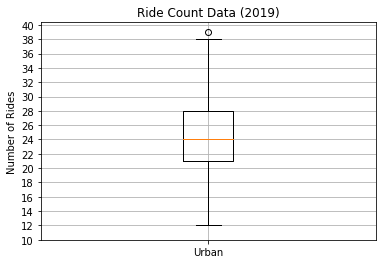

In [42]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

Looking at this box-and-whisker plot, we can see:

There is at least one outlier, which is close to 40. This our maximum data point, 39.
The minimum is 12.
The median is 24 or the 50th percentile.
The standard deviation is about 5 because the box upper and lower boundaries represent the upper and lower quartiles.

Note that the Box and Whisker plot results match the summary statistics when we apply the describe() method:

In [43]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

#### Create the Box and Whisker plot for all the city types

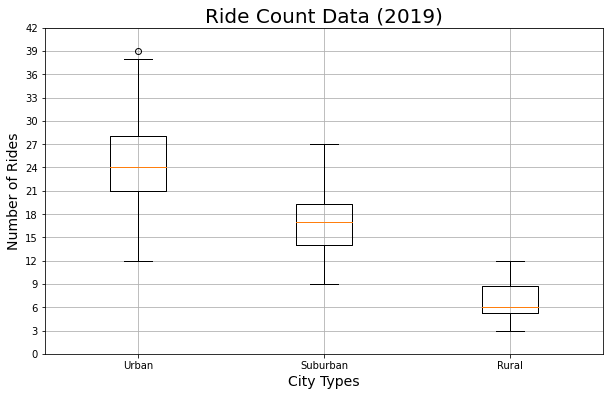

Summary Statistics


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [44]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
filename="./analysis/Figure5.jpg"
plt.savefig(filename)
plt.show()

print("Summary Statistics")
urban_ride_count.describe()

NOTE there is an outlier in the Urban ride count which is equal to 39.

In [45]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


### Box and Whisker plot for Ride Fare Data

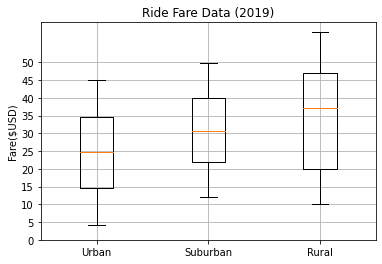

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [46]:
# Create a box-and-whisker plot for the cities fare data.
x_labels = ["Urban", "Suburban","Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fares_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

### Box-and-Whisker Plots for Driver Count Data

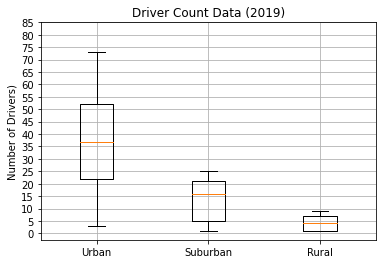

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [47]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(drivers_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

### Pie Chart

#### Get the Percentage of Fares for each City Type

To create this pie chart, we will need to do the following:

Get the total fares for each city type.
Get the total for all the fares for all the city types.
Calculate the percentage of the total fares for each city type.

To get the total fares for city type, we need to create a Series where the index is the type of city on the pyber_data_df DataFrame and the column is the sum of the fares for city type.

In [48]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [49]:
# Get the sum of all the fares.

# Option 1, ge the sum from the DF
# total_fares = pyber_data_df["fare"].sum()

# Option 2, get the sum from the list
total_fares = sum_fares_by_type.sum()

# Print the result
total_fares

63538.64

In [50]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

#### Build the Pie Chart

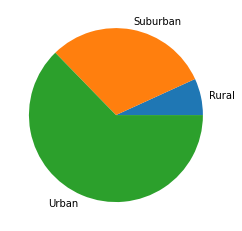

In [51]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

#### Format the Pie Chart

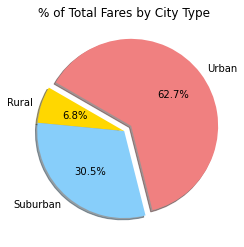

In [52]:
# Build the percentage of fares by city type pie chart.
import matplotlib as mpl

plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 18

# Save Figure
filename = "./analysis/Fig5.jpg"
plt.savefig(filename)

# Show Figure
plt.show()

#### Create pie chart of the total rides per city type:
First calculate the ride percentages then generate the plot

To create this pie chart, we need to do the following:

Get the total number of rides for each city type.
Get the total rides for all the city types.
Calculate the percentage of the total rides for each city type.
To get the total rides for each type of city, we need to create a Series of data where the index is the type of city, and the column for the Series is the number of the rides for the type of city.

In [53]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

#### Pie Chart for Percentage of Rides by City Type

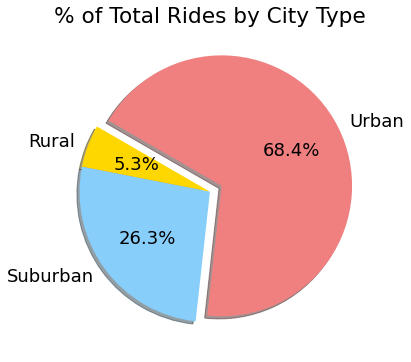

In [54]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

### Calculate Driver Percentages

The final pie chart will be the percentage of the total drivers for each city type, where each pie wedge will be the percentage of total drivers

In [56]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

#### Create the pie chart

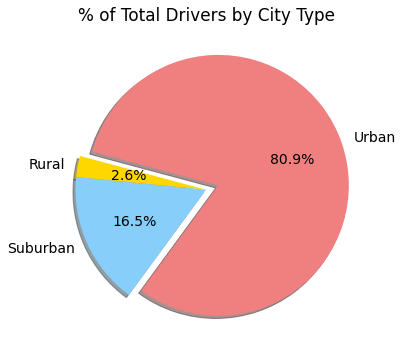

In [57]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()